In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.optimize import fsolve
from scipy import integrate


plt.rcParams["figure.figsize"] = (10,5)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

In [3]:
# Mpc-1 to Gev
Mpc = 3.085677581*10**22             #Mpc in m
c = 2.9979*10**8                     #Speed of Light m/s
hbar = 1.0545718 * 10**-34           #Reduced Planck Constant Js
e_char = 1.602176634*10**-19         #Electron's Charge C

Mpc_inv = 1/Mpc*c*hbar/e_char/10**9  #Transforms Mpc-1 to Gev
print("Mpc-1 = ",Mpc_inv, "Gev")

h = 0.6766                           #km/s/Mpc
H0_Gev = 100*h/(c/1000)*Mpc_inv      #H0/c Gev
print("H0/c = ",H0_Gev, "Gev")

G = 6.67408*10**-11                  #Gravitational Constant in m3 kg-1 s-2
M_Pl = np.sqrt(hbar*c/(8*np.pi*G)) * c**2 / e_char / 10**9
                                     #Planck Mass Gev
print("M_p = ",M_Pl, "Gev")

m_e = 9.10938356 * 10**-31           #Electron's Mass
Mu_B = e_char * hbar / (2 * m_e) / 10**4 / e_char / 10**9
                                     #Bohr Magneton
print("Mu_B = ",Mu_B, "Gev/G")

Mu_e = 2.0010 / 2 * Mu_B             #e Magneton
print("Mu_e = ",Mu_e, "Gev/G")

om_dm = 0.11933/h**2                 #D-Matter Density
print("om_dm = ",om_dm)

coeff = 10**21 * Mpc_inv * 10**-9 / Mu_e * M_Pl / 10**-22 * H0_Gev * 10**9 * np.sqrt(8*om_dm/3) * (3/2)
print("coeff = ",coeff)

Mpc-1 =  6.394879377142085e-39 Gev
H0/c =  1.4432687503166666e-42 Gev
M_p =  2.435313658990243e+18 Gev
Mu_B =  5.788381799130213e-18 Gev/G
Mu_e =  5.791275990029778e-18 Gev/G
om_dm =  0.26066675992680977
coeff =  0.04853764040483738


In [10]:
print(1/(10*coeff))

2.0602567237700695


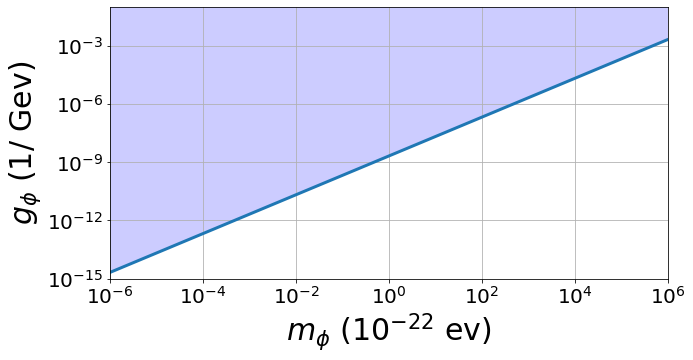

In [11]:
#g-m plot in units of B0=10^-21 G, k0=1 MPc-1

B = 1
k = 0.1

m_arr = np.logspace(-7,7,30)
g_arr = B * k / coeff * m_arr * 10**-9

f0,ax0 = plt.subplots()

plt.loglog( m_arr , g_arr ,linewidth=3.0)
plt.xlabel("$m_\phi$ ($10^{-22}$ ev)" , fontsize=30)
plt.ylabel('$g_\phi$ (1/ Gev)' , fontsize=30)
plt.grid()
axes = plt.gca()
axes.set_xlim([10**-6,10**6])
axes.set_ylim([10**-15, 10**-1])
plt.fill_between(m_arr , g_arr, 10**15,
#                  facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)
plt.show()

f0.savefig('g-m_plot.pdf',bbox_inches='tight')


1001
1000


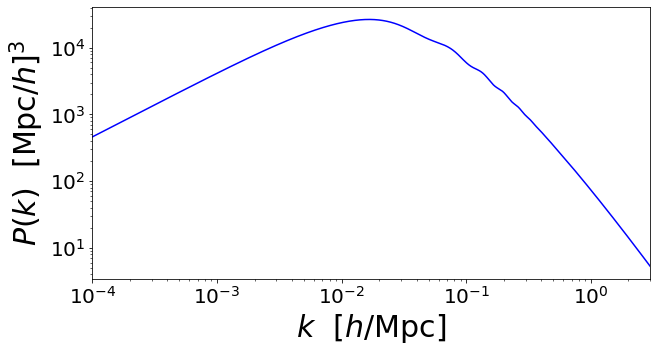

In [10]:
# Reading kk, Pk from CLASS code
fhand = open("kk_pk.txt","r")
kk = []
Pk = []

count = 0
for line in fhand:
    count = count + 1
    if count != 1:
        words = line.split()
        kk.append(float(words[0]))
        Pk.append(float(words[1]))
#     print(line)

print(count)
print(len(kk))

# plot P(k)
# plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=30)
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$', fontsize=30)
plt.plot(kk,Pk,'b-')

# plt.savefig('warmup_pk.pdf')


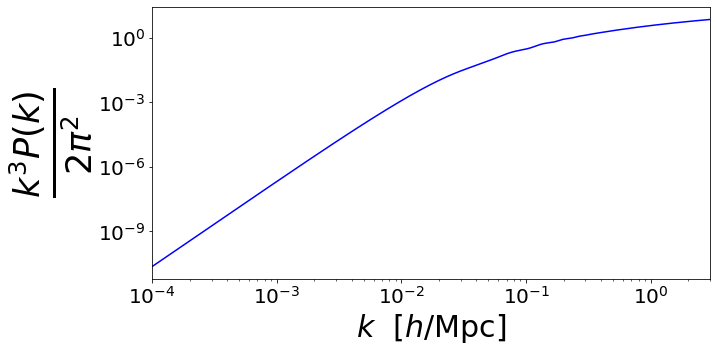

In [11]:
kka = np.array(kk)
Pka = np.array(Pk)

plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],kka[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=30)
plt.ylabel(r'$\frac{k^3 P(k)}{2\pi^2} \,\,\,\,$', fontsize=50)
k3pk = kka**3 * Pka / (2*np.pi**2)
plt.plot(kka,k3pk,'b-')

plt.savefig('dimless_power.pdf')

In [12]:
m_test = 10**-22 #ev
# t0_test = 4.32*10**17
t_test = 0.01 * 2/(3*H0_Gev*10**-9)
a_test = 1/21.0
c_test = 2 * M_Pl * 10**9 / m_test * np.sqrt(om_dm/3) * np.cos(m_test*t_test)
print(c_test)
# print(np.cos(m_test*t_test))
# print(M_Pl)

Dk = c_test * k3pk**(0.5)
Ck = Dk * ( ((kka/(4*m_test*a_test))**2)/((kka/(4*m_test*a_test))**2+1) - np.cos(2*m_test*t_test) ) / np.sin(2*m_test*t_test)
# (kk/(4*m_test*a_test))**2


1.3746164804227044e+49


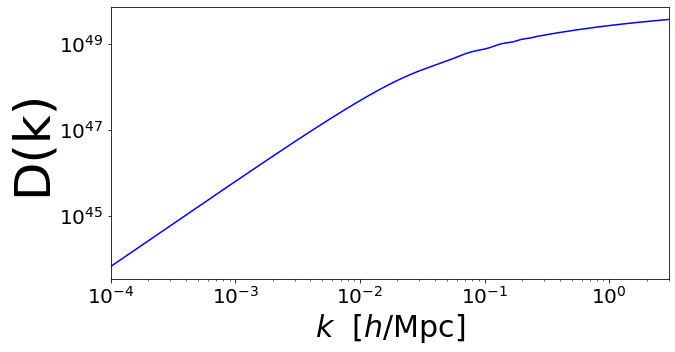

In [13]:
plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],kka[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=30)
plt.ylabel(r'D(k)', fontsize=50)
plt.plot(kka,Dk,'b-')

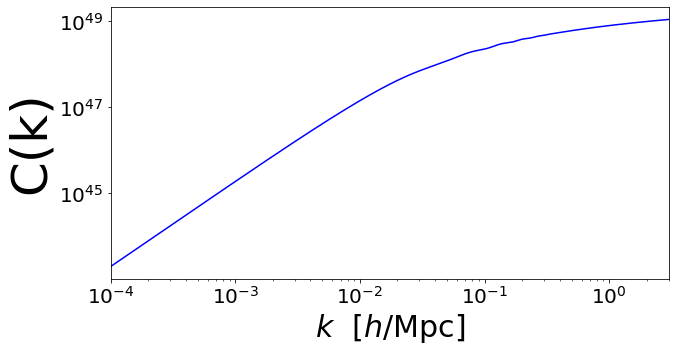

In [14]:
plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],kka[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=30)
plt.ylabel(r'C(k)', fontsize=50)
plt.plot(kka,Ck,'b-')

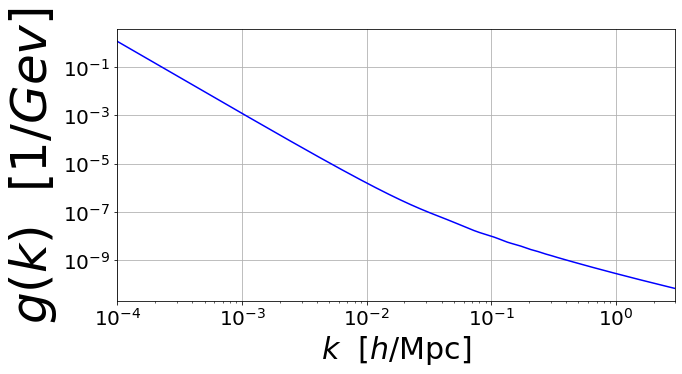

In [15]:
B_test = 10**-21 # Gauss
gk = Mu_e * B_test * (2/(3*H0_Gev)) * (a_test)**(3/2) / (Mpc_inv*kka) / (Ck* np.cos(m_test*t_test)+ Dk *np.sin(m_test*t_test))

plt.xscale('log');plt.yscale('log');plt.xlim(kka[0],kka[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$', fontsize=30)
plt.ylabel(r'$ g(k) \,\,\,\, [1/Gev]$', fontsize=50)
plt.plot(kka,gk,'b-')
plt.grid()

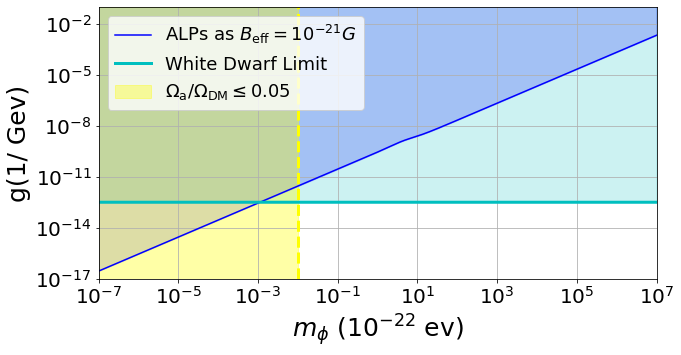

In [8]:
mm = np.logspace(-7,7,10000)

pk1 = 72.8
k_test = 1.0
# Dofm = 2 * M_Pl * 10**9 / (mm*10**-22) * np.sqrt(om_dm/3) * np.cos((mm*10**-22)*t_test) * np.sqrt(k_test**3*pk1/(2*np.pi**2))
Dofm = 2 * M_Pl * 10**9 / (mm*10**-22) * np.sqrt(om_dm/3) * np.sqrt(1/2) * np.sqrt(k_test**3*pk1/(2*np.pi**2))


# Cofm = Dofm * ( ((k_test/(4*mm*a_test))**2)/((k_test/(4*mm*a_test))**2+1) - np.cos(2*mm*t_test) ) / np.sin(2*mm*t_test)
Cofm = Dofm * ( ((k_test/(4*mm*a_test))**2)/((k_test/(4*mm*a_test))**2+1) - np.sqrt(1/2) ) / np.sqrt(1/2)


f,ax = plt.subplots()


# gofm = Mu_e * B_test * (2/(3*H0_Gev)) * (a_test)**(3/2) / (Mpc_inv*k_test) / (Cofm* np.cos(mm*t_test)
#                                                                               + Dofm *np.sin(mm*t_test))
gofm = Mu_e * B_test * (2/(3*H0_Gev)) * (a_test)**(3/2) / (Mpc_inv*k_test) / np.sqrt((Cofm**2 + Dofm**2 )/2)
# PLOTTING g(m)
plt.xscale('log');plt.yscale('log');plt.xlim(mm[0],mm[-1])
plt.xlabel("$m_\phi$ ($10^{-22}$ ev)", fontsize=25)
plt.ylabel(r'g(1/ Gev)', fontsize=25)
axes = plt.gca()
axes.set_xlim([10**-6,10**6])
axes.set_ylim([10**-17, 10**-1])
plt.plot(mm,gofm,'b-', label='ALPs as $B_\mathrm{eff}=10^{-21} G$')

wdl0 = 10**-10 * mm / mm
wdl = 3.3*10**-13 * mm / mm

plt.xscale('log');plt.yscale('log');plt.xlim(mm[0],mm[-1])
# plt.legend(['White Dwarf Limit'])
# plt.plot(mm,wdl0,'r-',linewidth=3.0, label='White Dwarf Old Limit')
plt.plot(mm,wdl,'c-',linewidth=3.0, label='White Dwarf Limit')
plt.fill_between(mm , wdl, 10, color='c', alpha=0.2)

vertical_line_position = 1e-2
ax.axvline(x=vertical_line_position, color='yellow', linestyle='--',linewidth=3.0)
label_no_dm = '$\Omega_\mathrm{a}/\Omega_\mathrm{DM} \leq$0.05'
ax.axvspan(1e-07, vertical_line_position, alpha=0.35, color='yellow', label=label_no_dm)

ax.legend(loc='upper left',fontsize='18')
plt.grid()
plt.fill_between(mm , gofm, 10,color='blue',alpha=0.2)


f.savefig('g-m_plot__.png',bbox_inches='tight', dpi=100)
